# Sampling non-uniform distributions 


To generate two independent standard normal random variables $Z_1, Z_2 \sim \mathcal{N}(0,1)$ from two independent uniform random variables $U_1, U_2 \sim \mathcal{U}(0, 1)$, use the **Box–Muller transform**: $Z_1 = \sqrt{-2 \ln U_1} \cos(2\pi U_2)$ and $Z_2 = \sqrt{-2 \ln U_1} \sin(2\pi U_2)$

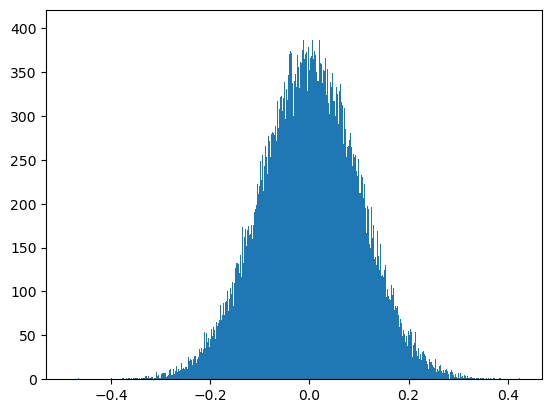

In [8]:
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
plt.hist(s,bins=1000);

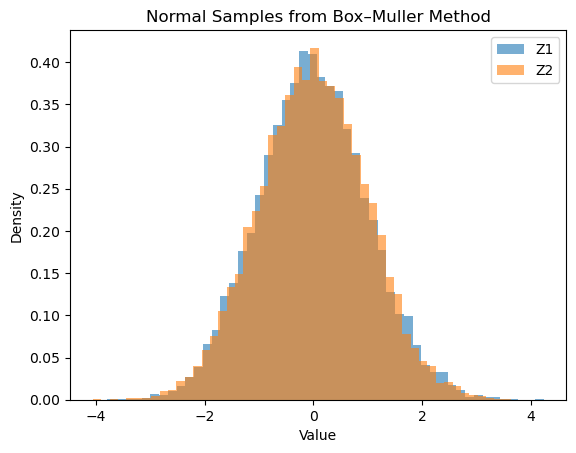

In [9]:
#aside: how to sample normally distributed points using uniform transformation


U1 = np.random.uniform(size=10000)
U2 = np.random.uniform(size=10000)

# Box–Muller transform
Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

# X = mu + sigma * Z1 (if you want to sample N(mu, sigma^2))

plt.hist(Z1, bins=50, density=True, alpha=0.6, label="Z1")
plt.hist(Z2, bins=50, density=True, alpha=0.6, label="Z2")
plt.title("Normal Samples from Box–Muller Method")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend();

# Gibbs Sampling

- Gibbs Sampling is a Markov Chain Monte Carlo (MCMC) algorithm.
- It provides an alternate sampling method when direct sampling from the full  joint distribution $p(x_1, x_2, \dots, x_n)$ becomes difficult (because of high-dimension, for example).

## Algorithm 

- Start with an initial guess $(x_1^{(0)}, x_2^{(0)}, \dots, x_n^{(0)})$
- Iteratively update each variable by sampling its *conditional distribution*:

$$
\begin{align*}
x_1^{(t+1)} &\sim \pi(x_1 \mid x_2^{(t)}, x_3^{(t)}, \dots, x_n^{(t)})\\
x_2^{(t+1)} &\sim \pi(x_2 \mid x_1^{(t+1)}, x_3^{(t)}, \dots, x_n^{(t)})\\
&\vdots\\
x_n^{(t+1)} &\sim \pi(x_n \mid x_1^{(t+1)}, x_2^{(t+1)}, \dots, x_{n-1}^{(t+1)})
\end{align*}
$$

- Gibbs sampling constructs a Markov chain whose stationary distribution is the target joint distribution. That means, under certain mild conditions, the samples converge to the true distribution: $\lim_{t \to \infty} p(x^{(t)}) = p(x)$
- As each step samples from a lower-dimensional distribution, the algorithm remains efficient even in high dimensions.



,X,Y
0,-0.367898,-0.439796
1,0.371969,-0.357111
2,-0.369073,-0.927970
3,-0.809113,-0.904371
4,0.066614,-0.326860
...,...,...
995,0.079993,0.688247
996,0.453939,0.144606
997,-0.068770,0.344300
998,1.205069,1.413728


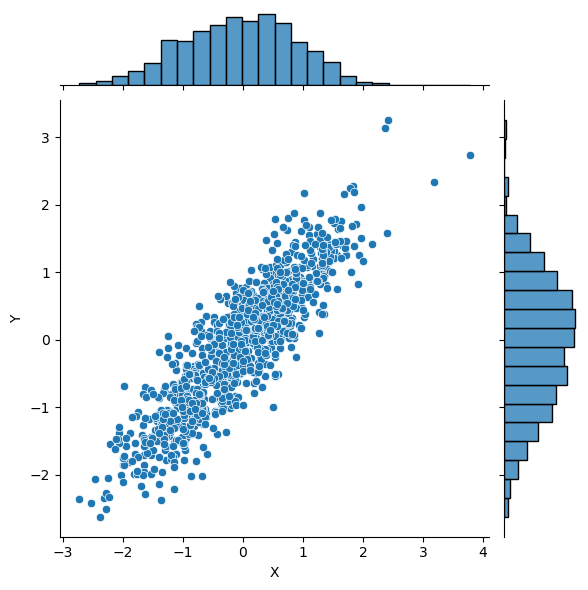

In [10]:
# gibbs sampling

import numpy as np
import seaborn as sns
import pandas as pd

mu_x, mu_y, sigma_x, sigma_y, rho = 0, 0, 1, 1, 0.9
sx_gy = np.sqrt(1 - rho**2) * sigma_x
sy_gx = np.sqrt(1 - rho**2) * sigma_y
# this formulas are not derived because the derivations are involved and not immediately relevant for understanding the idea of Gibbs sampling. But you should derive them at some point! This is a good reference: https://webspace.maths.qmul.ac.uk/a.gnedin/LNotesStats/MS_Lectures_5.pdf

def gibbs_sampler(n, x=0, y=0):
    samples = np.zeros((n, 2))
    for i in range(n):
        x = np.random.normal(mu_x + rho * (sigma_x / sigma_y) * (y - mu_y), sx_gy)
        y = np.random.normal(mu_y + rho * (sigma_y / sigma_x) * (x - mu_x), sy_gx)
        # print(x,y)
        samples[i] = [x, y]

    return samples


df = pd.DataFrame(gibbs_sampler(1000), columns=["X", "Y"])
df
sns.jointplot(data=df, x="X", y="Y")


# Restricted Boltzmann Machine (RBM)

A type of generative stochastic neural network that can learn a probability distribution over a set of inputs. They are especially useful for:

- **Learning low-dimensional representations** of high-dimensional binary data (e.g., images or text).
- **Unsupervised pretraining** of deep neural networks (as in Deep Belief Networks).
- **Modeling complex distributions** and generating new samples that resemble the training data.

The key idea is that RBMs can discover useful latent features (hidden units) that capture the structure in the input data without requiring labeled examples.

**References**

- [Hugo Larochelle's lecture notes](https://larocheh.github.io/neural_networks/content.html) and his accompanying explanations on [YouTube](https://www.youtube.com/playlist?list=PL6Xpj9I5qXYEcOhn7TqghAJ6NAPrNmUBH). **This is *strongly recommended***.
- Fischer, A., & Igel, C. (2012). An Introduction to Restricted Boltzmann Machines. In L. Alvarez, M. Mejail, L. Gomez, & J. Jacobo (Eds.), [Progress in Pattern Recognition, Image Analysis, Computer Vision, and Applications (pp. 14–36). Springer](https://doi.org/10.1007/978-3-642-33275-3_2) (**Quite advanced**)
- Tieleman, T. (2008). Training restricted Boltzmann machines using approximations to the likelihood gradient. [Proceedings of the 25th International Conference on Machine Learning - ICML ’08, 1064–1071.](https://doi.org/10.1145/1390156.1390290) (**Recommended if you're interested in how RBMs are trained in Scikit-learn**)


## Model

- $\mathbf{x}$: visible layer (binary units)  
- $\mathbf{h}$: hidden layer (binary units)  
- $\mathbf{W}$: weights  
- $\mathbf{b}$: bias for hidden units  
- $\mathbf{c}$: bias for visible units  

The energy function for a configuration of visible units $\mathbf{x}$ and hidden units $\mathbf{h}$ is:

$$
\begin{align*}
E(\mathbf{x}, \mathbf{h}) &= -\mathbf{h}^\top \mathbf{W} \mathbf{x} - \mathbf{c}^\top \mathbf{x} - \mathbf{b}^\top \mathbf{h} \\
&= -\sum_j \sum_k W_{j,k} h_j x_k - \sum_k c_k x_k - \sum_j b_j h_j
\end{align*}
$$

The joint probability distribution over $\mathbf{x}$ and $\mathbf{h}$ is:

$$
p(\mathbf{x}, \mathbf{h}) = \frac{\exp(-E(\mathbf{x}, \mathbf{h}))}{Z}
$$

where $Z$ is the partition function:

$$
Z = \sum_{\mathbf{x}, \mathbf{h}} \exp(-E(\mathbf{x}, \mathbf{h}))
$$


## Conditional Distributions

**Conditionals of hidden units given visible units**

Given visible units $\mathbf{x}$, the hidden units $\mathbf{h}$ are conditionally independent (no connections between units in the hidden layer):

$$
p(\mathbf{h} \mid \mathbf{x}) = \prod_j p(h_j \mid \mathbf{x})
$$

For a hidden unit, the activation probability is:

$$
\begin{align*}
p(h_j = 1 \mid \mathbf{x}) &= \frac{1}{1 + \exp\left( - (b_j + \mathbf{W}_j \cdot \mathbf{x}) \right)} \\
&= \text{sigm}(b_j + \mathbf{W}_j \cdot \mathbf{x})
\end{align*}
$$

where $\mathbf{W}_j$ is the $j^{\text{th}}$ row of the weight matrix $\mathbf{W}$.


**Conditionals of visible units given hidden units**

Similarly, the conditional distribution of visible units given hidden units is:

$$
p(x_k = 1 \mid \mathbf{h}) = \frac{1}{1 + \exp\left( - (c_k + \mathbf{h}^\top \mathbf{W}_{\cdot k}) \right)}
$$

or using the sigmoid function:

$$
p(x_k = 1 \mid \mathbf{h}) = \text{sigm}(c_k + \mathbf{h}^\top \mathbf{W}_{\cdot k})
$$

where $\mathbf{W}_{\cdot k}$ is the $k^{\text{th}}$ column of the weight matrix $\mathbf{W}$.


## Training RBMs: Contrastive Divergence (CD)

- Training an RBM involves adjusting its parameters ($\mathbf{W}$, $\mathbf{b}$, $\mathbf{c}$) to maximize the likelihood of the data. However, computing the exact gradient of the log-likelihood is intractable due to the partition function $Z$.
- Instead, an efficient approximation called **Contrastive Divergence (CD)**, which uses Gibbs Sampling, is commonly used. 
- The objective is the maximize the log-likelihood $\log p(\mathbf{x}) = \log \sum_{\mathbf{h}} p(\mathbf{x}, \mathbf{h})$
- For details on training an RBM, please see Larochelle's notes linked in the beginning. They are a bit involved for this course.
  
## Applications of RBMs

RBMs have been used in various domains:

- **Dimensionality reduction:** Like PCA but nonlinear and probabilistic.
- **Feature learning:** RBMs can learn meaningful hidden representations.
- **Pretraining deep networks:** Stacking RBMs gives rise to Deep Belief Networks (DBNs).


In [11]:
from sklearn.neural_network import BernoulliRBM
import numpy as np
import matplotlib.pyplot as plt

# binary input data: 100 samples, 6 binary features
np.random.seed(0)
X = np.random.randint(0, 2, size=(100, 6))

# rbm with 2 hidden units
rbm = BernoulliRBM(n_components=2)

# train
rbm.fit(X)

# the learned weight vector
w = rbm.components_
print("Learned weight vector (shape {}):".format(w.shape))
print(w)

BernoulliRBM(n_components=2)

Learned weight vector (shape (2, 6)):
[[-0.05683523 -0.00236561  0.10650033 -0.01235765  0.04188159 -0.10687343]
 [-0.06340282 -0.00057296  0.10542503 -0.00186113  0.06988594 -0.11975815]]


Please check [this example from scikit team](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py) for an actual demonstration.